In [5]:
from matplotlib.pyplot import *
import numpy as np
from prospectFunctions import *
# import itertools
# import astropy.units as u
# import astropy.constants as const
import time
# from tqdm import tqdm
import fsps
from prospect.sources import CSPSpecBasis

In [30]:
grid_ranges, run_params = getParams(len_logz=100,len_dust=6,len_tage=100,dust=True)
a = 1.0 + run_params['zred']
# grid_ranges['dust2'] = np.zeros(1) # So we can speed up the process
logzs = grid_ranges['logzsol']
dusts = grid_ranges['dust2']
tages = grid_ranges['tage']

# obs = getObs(**run_params)
# sps = getSps(**run_params)
# wspec, wphot = getWave(obs=obs, sps=sps, **run_params)

In [22]:
# sp = StellarPopulation(imf_type=2, zcontinuous=1)
# sp.params["imf_type"] = 1
# sp.params["logzsol"] = -0.3
# sp.params["sfh"] = 1
sps = CSPSpecBasis(zcontinuous=1, imf_type=1, urmom=1)

In [23]:
sps.params['urmom']

1

In [20]:
starts = np.linspace(3620, 3850, 2, dtype=int)

In [26]:
data_grid_params = np.load('params_imf_2_60000.npy')
data_grid_spec = np.load('specs_imf_2_60000.npy')

In [27]:
data_grid_breaks_D4000 = np.load('breaks_D4000_imf_2_60000.npy')
data_grid_breaks_Anna = np.load('breaks_Anna_imf_2_60000.npy')

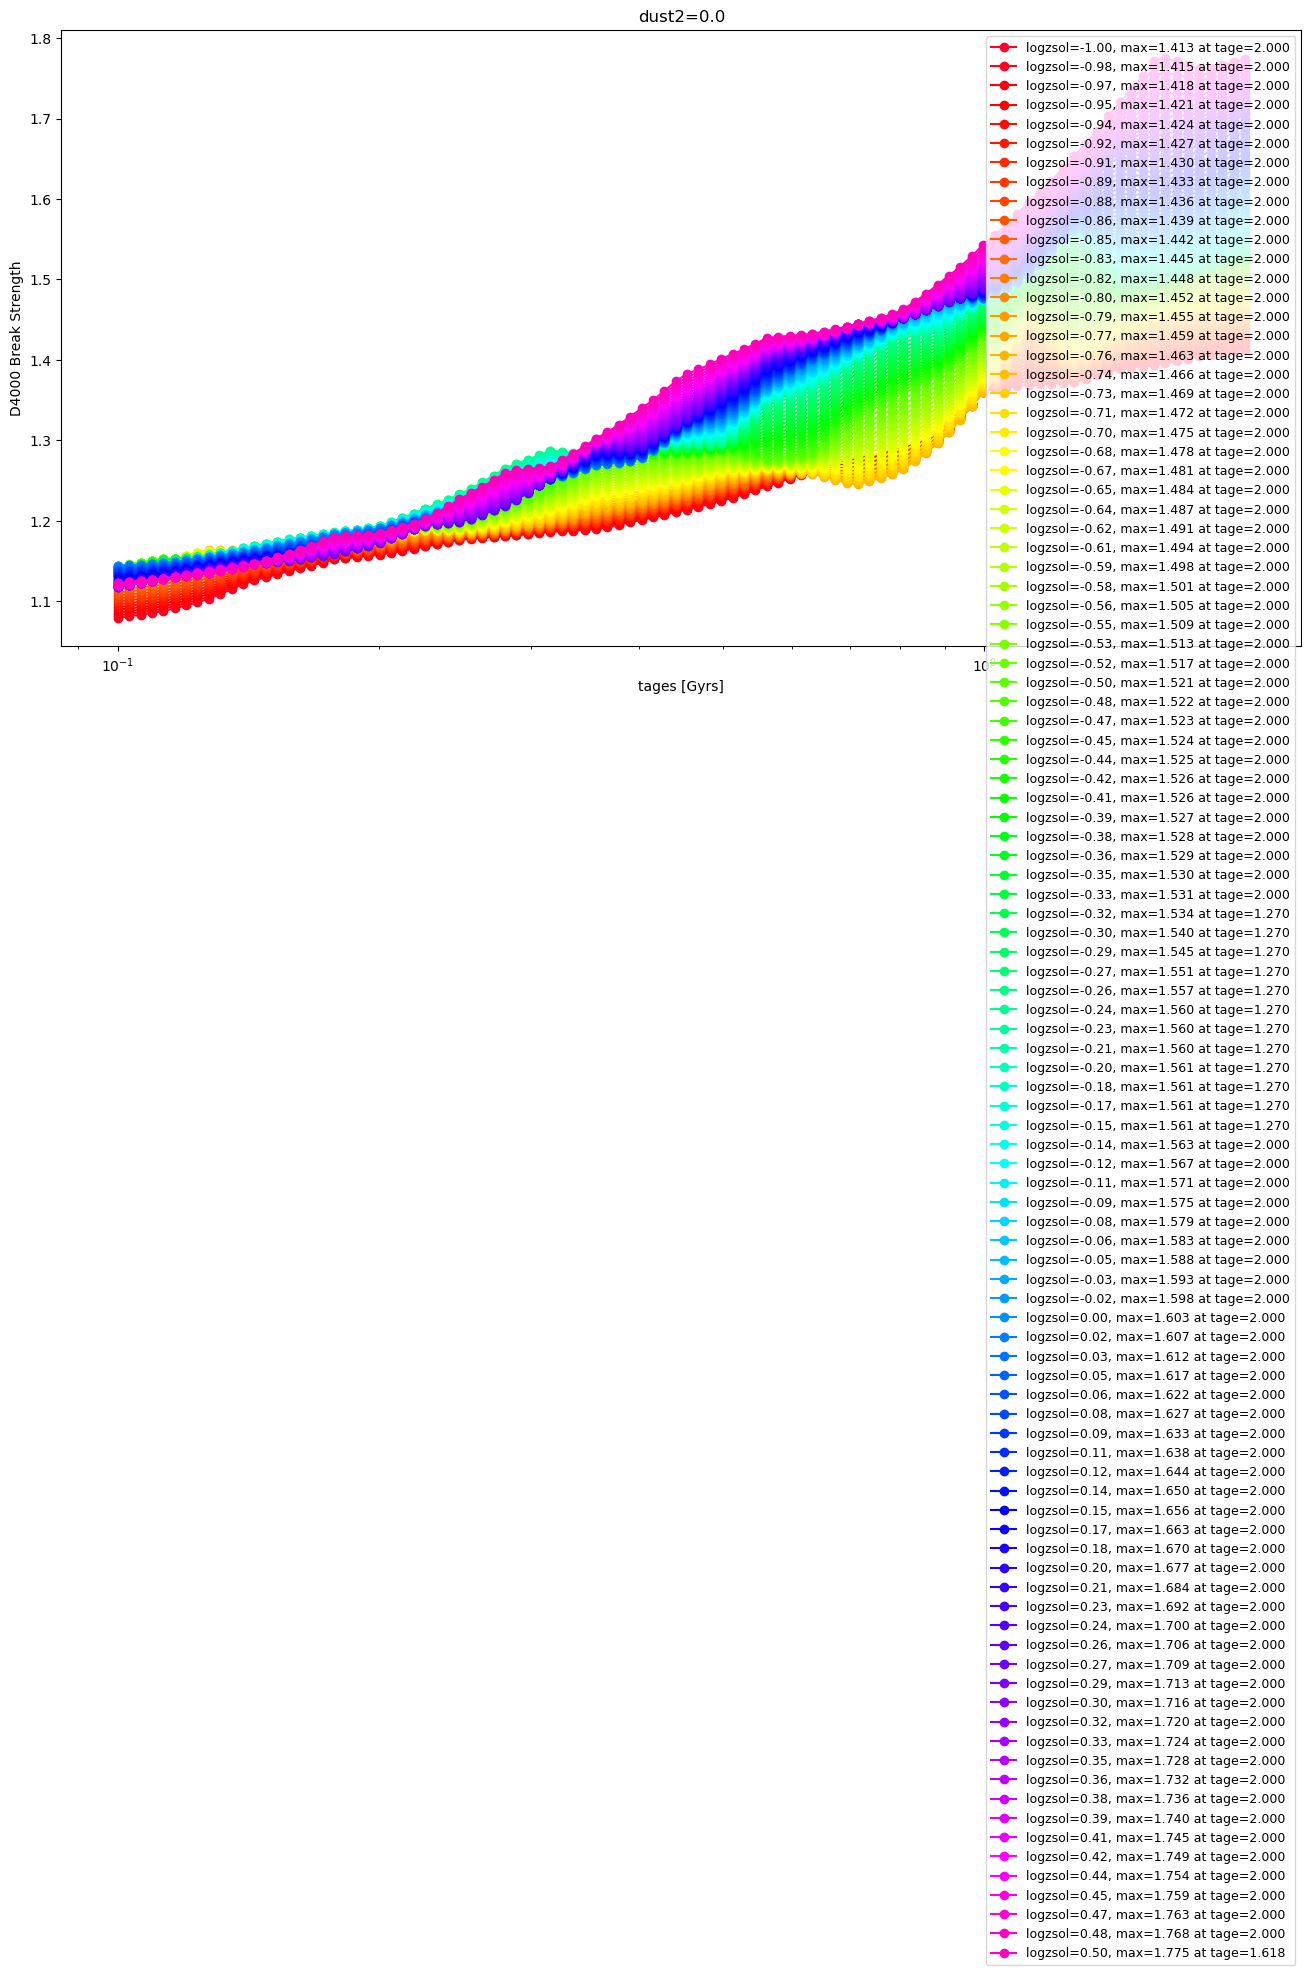

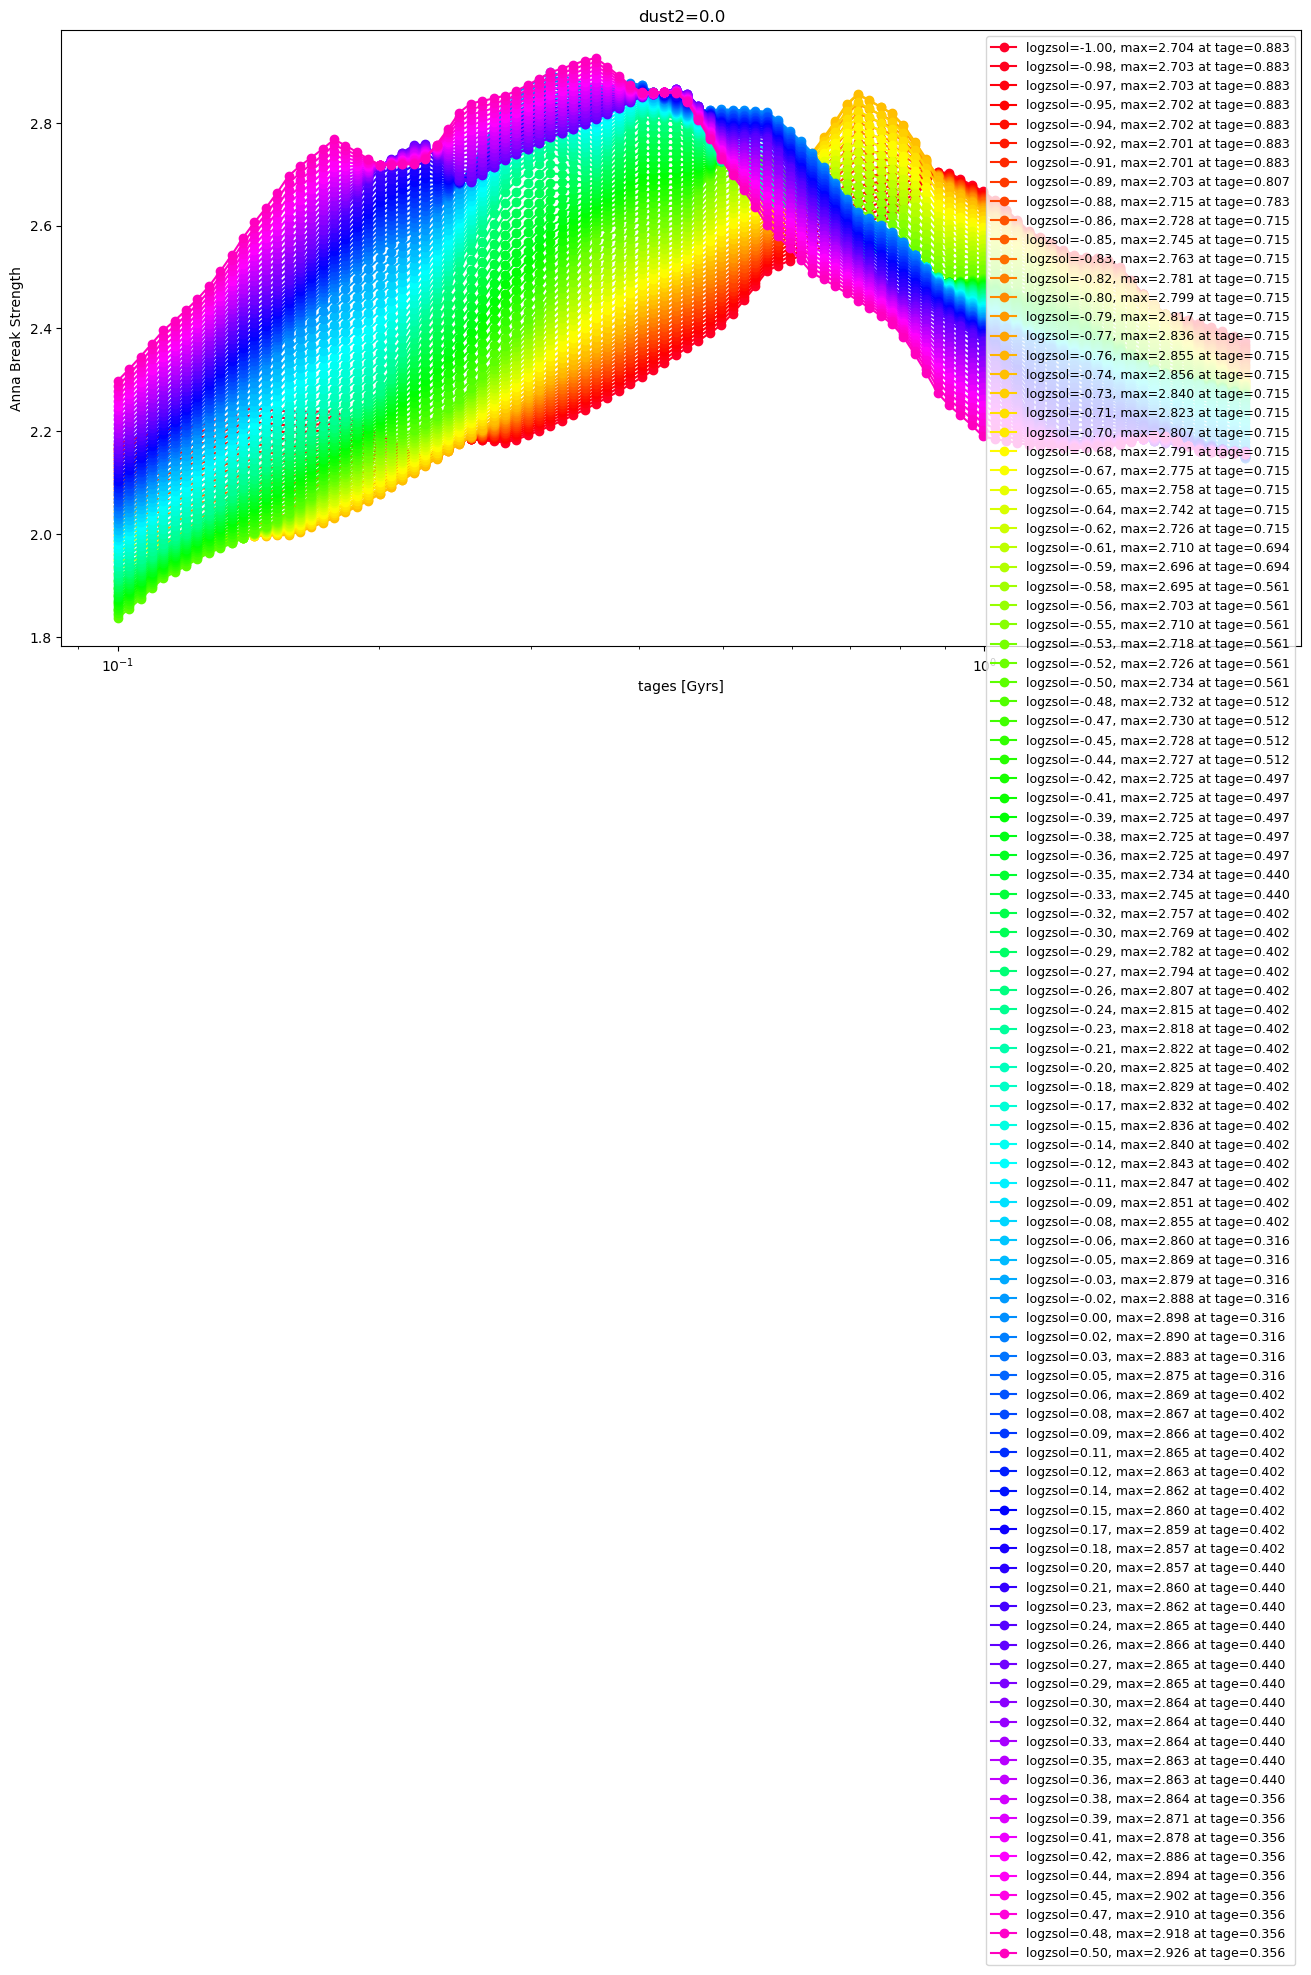

In [32]:
i_dust = 0

color = cm.gist_rainbow(np.linspace(0, 1, len(logzs)))

figure(figsize=(16,8))

for i_logz in range(len(logzs)):

    maxi = data_grid_breaks_D4000[i_logz,0,:,0].max()
    index_of_max = list(data_grid_breaks_D4000[i_logz,0,:,0]).index(maxi)
    
    plot(grid_ranges['tage'], data_grid_breaks_D4000[i_logz,0,:,0], '-o', color=color[i_logz], label=f'logzsol={logzs[i_logz]:.2f}, max={maxi:.3f} at tage={tages[index_of_max]:.3f}')

xscale('log')

legend(fontsize=9)

title_text = f'dust2={dusts[i_dust]}'
title(title_text)

xlabel('tages [Gyrs]')
ylabel("D4000 Break Strength")

# savefig("D4000_Break_strength_vs_tage_10.png")

show()

###########################################################################################################################################

color = cm.gist_rainbow(np.linspace(0, 1, len(logzs)))

figure(figsize=(16,8))

for i_logz in range(len(logzs)):

    maxi = data_grid_breaks_Anna[i_logz,0,:,0].max()
    index_of_max = list(data_grid_breaks_Anna[i_logz,0,:,0]).index(maxi)
    
    plot(grid_ranges['tage'], data_grid_breaks_Anna[i_logz,0,:,0], '-o', color=color[i_logz], label=f'logzsol={logzs[i_logz]:.2f}, max={maxi:.3f} at tage={tages[index_of_max]:.3f}')

xscale('log')

legend(fontsize=9)

title_text = f'dust2={dusts[i_dust]}'
title(title_text)

xlabel('tages [Gyrs]')
ylabel("Anna Break Strength")

# savefig("Anna_Break_strength_vs_tage_10.png")

show()